#  <h1 align="center"><B>Movie Analysis</B></h1>

#### Written By Farjana Anwerbasha

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import numpy as np
import string
plt.rcParams["figure.figsize"] =(12,6)

##### Including %matplotlib inline to make plot being displayed in notebook
##### including plt.rcParams to customize plot size being displayed

#### Question No. : 1
##### How often are movies classified by more than one genre?

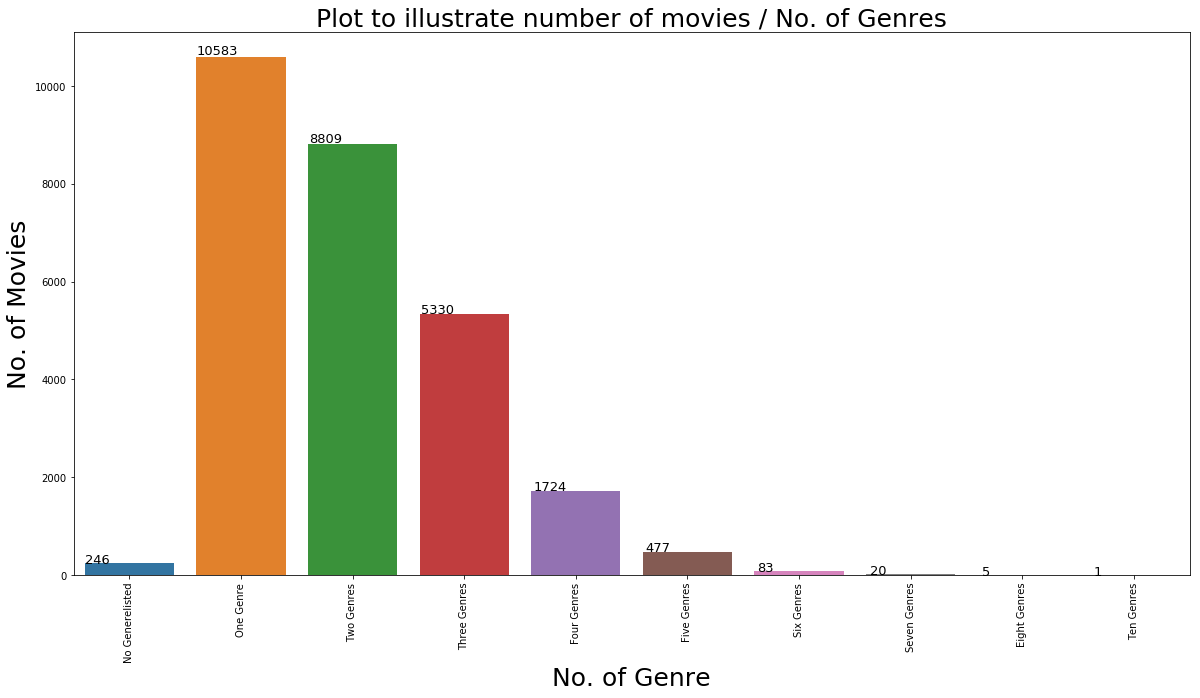

In [16]:
movies_genre=pd.read_csv(r'C:\Users\mahre\Desktop\ml-20m\movies.csv',usecols=['genres'])
genrelist=[]
for data in movies_genre.genres:
    splitdata=data.split('|')
    if splitdata[0]== '(no genres listed)':
        nogenere=0
        genrelist.append(nogenere)
    else:
        genre=len(splitdata)
        genrelist.append(genre)
output_genre=pd.DataFrame(genrelist,columns=['values'])
ax = sns.countplot(x='values',data=output_genre)
ax.set_title('Plot to illustrate number of movies / No. of Genres', size=25)
ax.set_xlabel('No. of Genre', size=25)
ax.set_ylabel('No. of Movies', size=25)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), size=13)
labels = ['No Generelisted', 'One Genre','Two Genres','Three Genres','Four Genres','Five Genres','Six Genres','Seven Genres','Eight Genres','Ten Genres' ]
ax.set_xticklabels(labels,rotation=90)
plt.show()


##### File movies.csv is being read and the column 'genres' is being saved in DataFrame 'movies_genre'
##### As more than one genre is being classified for single movie, 'data.split' function used to split genre column using 'the pipe |' symbol as seperator
##### 'if' loop is being used to check the data for 'no genres listed' and the count is being added to variable 'nogenere'
##### 'else' is being used to append the remaining genre count in a list 'genrelist'
##### converting list 'genrelist' into DataFrame 'output_genre' with columns 'values'
##### 'countplot' function creates plot using 'values' as 'x axis' of DataFrame 'output_genre'

#### Question No. : 2
##### Which genres are the most popular?

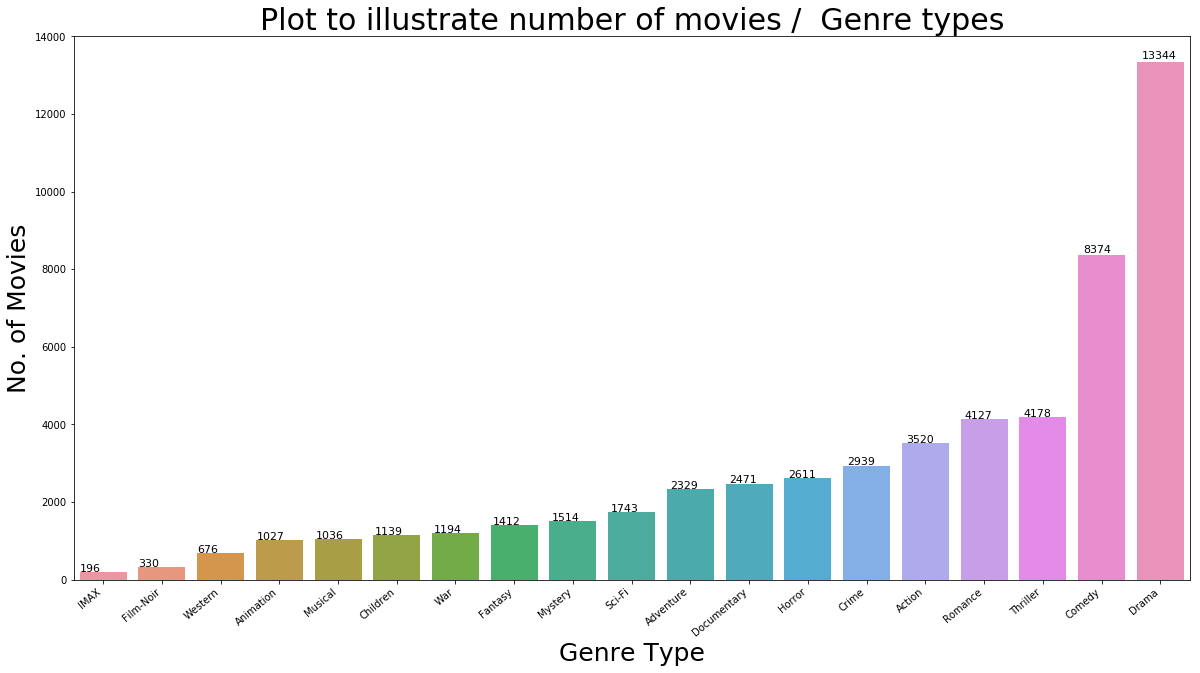

In [15]:
splitdatalist=[]
for data in movies_genre.genres:
    splitdata=data.split('|')
    splitdata=[word for word in splitdata if word!='(no genres listed)']
    splitdatalist.extend(splitdata)
splitdata_genre=pd.DataFrame(splitdatalist,columns=['Genre'])
ax = sns.countplot(x='Genre',data=splitdata_genre,order = splitdata_genre['Genre'].value_counts(ascending=True).index)
ax.set_title('Plot to illustrate number of movies /  Genre types', size=30)
ax.set_xlabel('Genre Type', size=25)
ax.set_ylabel('No. of Movies', size=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), size=11)
plt.show()    

##### Using previously created DataFrame 'move_genre' for this plot
##### splitdata stored the words in the DataFrame 'movie_genre' with condition (word !=no geners listed
##### New DataFrame 'splitdata_genre' is being appended with 'genre' column of splitdatalist
##### countplot using splitdata_genre and column 'Genre' as 'x axis' while sorting the data in ascending

#### Question No. : 3
##### Which tags are the most popular?

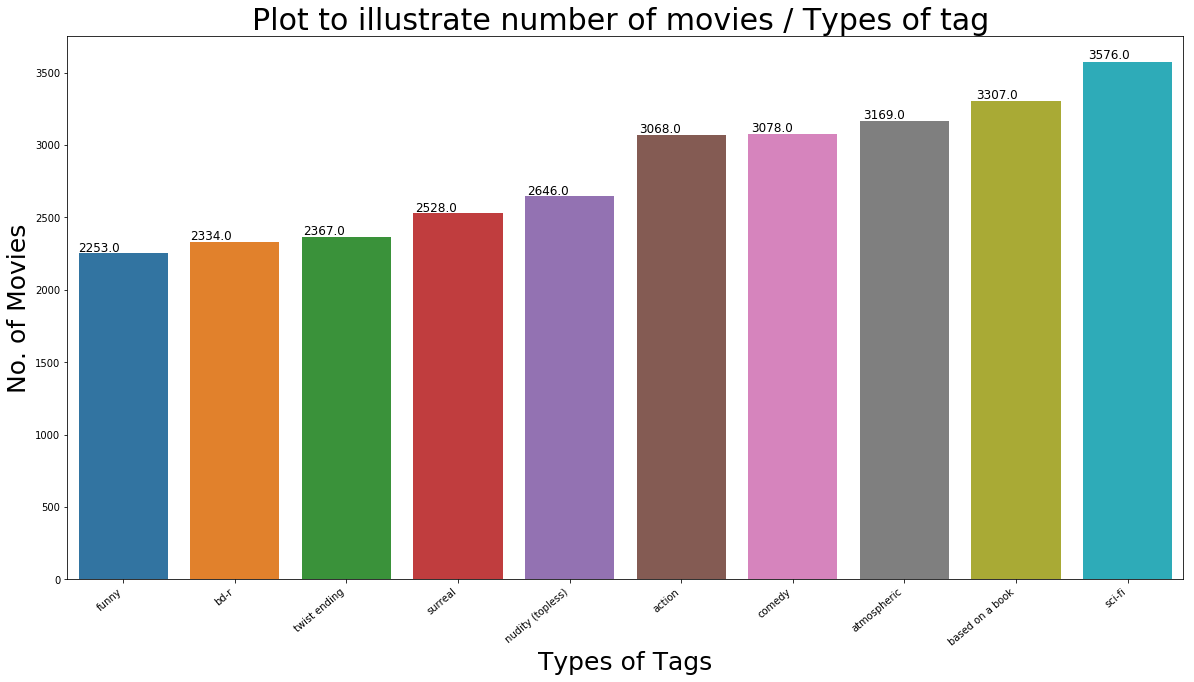

In [14]:
tags_tag=pd.read_csv(r'C:\Users\mahre\Desktop\ml-20m\tags.csv',usecols=['tag'])
tags_tag['tag'] = tags_tag.tag.str.lower()
sortedcount=tags_tag['tag'].value_counts(ascending=False, sort=True)
sorted_count_tag=pd.DataFrame({'tag':sortedcount.index,'count':sortedcount.values}).head(10).sort_values(['count'], ascending=[True])
ax = sns.barplot(x="tag",y="count", data=sorted_count_tag)
ax.set_title('Plot to illustrate number of movies / Types of tag ', size=30)
ax.set_xlabel('Types of Tags', size=25)
ax.set_ylabel('No. of Movies', size=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),size=12)
plt.show()    

##### DataFrame 'tags_tag' is being created using 'tags.csv' and column 'tag'
##### changing all the data inside the DataFrame using 'str.lower'
##### sorting the values of 'tag' using 'value_counts' in descending order
##### selecting top 10 most used tags using 'head(10)' and 'sort_values' command in ascending order and storing it in DataFrame sorted_count_tag'
##### ploting using 'sorted_count_tag' and ' tag for x axis' 'count for y axis'

#### Question No. : 4
##### How many ratings where given each year?

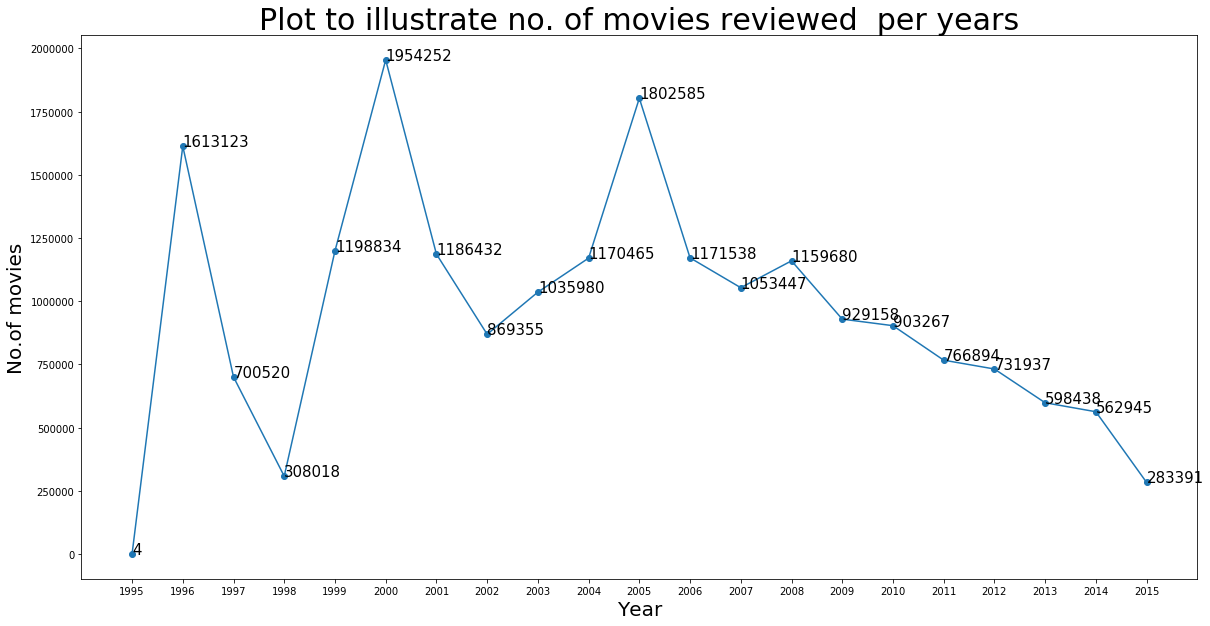

In [13]:
rating_time=pd.read_csv(r'C:\Users\mahre\Desktop\ml-20m\ratings.csv',usecols=['timestamp'])
time_year=[]
for data in rating_time.timestamp:
    dt = datetime.fromtimestamp(int(data))
    year = dt.strftime('%Y')
    time_year.append(year)
countyear=Counter(time_year)
years = pd.DataFrame()
years['year'] = countyear.keys()
years['count'] = countyear.values()
tst=years.sort_values('year')
plt.title('Plot to illustrate no. of movies reviewed  per years', fontsize=30)
plt.xlabel('Year',fontsize=20)
plt.ylabel('No.of movies',fontsize=20)
plt.plot(tst['year'],tst['count'], 'o-')
for a,b in zip(tst['year'],tst['count']):
    plt.text(a,b,str(b), position=(a,b),size=15)
plt.show()

##### DataFrame 'rating_time' is being created using 'ratings.csv' and column 'timestamp'
##### storing the data of timestamp in time_year using functions 'dt.strftime(%Y)'
##### sorting list 'time_year' using 'Counter' and converting list 'time_year' as DataFrame 'years' 
##### sorting data of 'years' using 'sort_values' and saving it in 'tst'
##### using 'year' and 'count' column of 'tst' to plot 

#### Question No. : 5
##### How are ratings distributed?

Average: 2.75


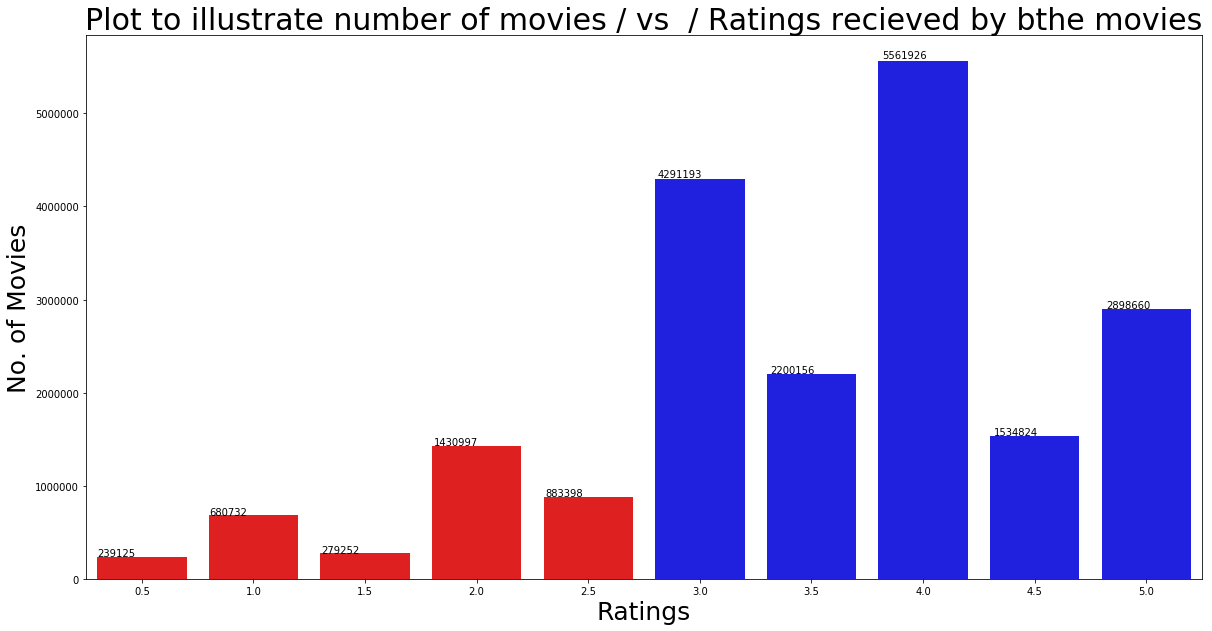

In [12]:
df=pd.read_csv(r'C:\Users\mahre\Desktop\ml-20m\ratings.csv',usecols=['rating'])
conv=pd.DataFrame(pd.to_numeric(df.rating))
custom_palette = {}
list_set=list(set(conv.rating))
avg=np.average(list_set)
print('Average:',avg)
for data in list_set:
    if data <= avg:
        custom_palette[data] = 'r'
    else:
        custom_palette[data] = 'b'
ax = sns.countplot(x='rating',data=conv,palette=custom_palette)
ax.set_title('Plot to illustrate number of movies / vs  / Ratings recieved by bthe movies', size=30)
ax.set_xlabel('Ratings', size=25)
ax.set_ylabel('No. of Movies', size=25)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), size=10)



##### DataFrame 'rating_rating' is being created using 'ratings.csv' and column 'rating'
##### average is being calculated using 'np.average' 
##### 'custom_palette' is being created and using 'if' loop, color is being defined for the ratings under and above average
##### using DataFrame 'rating_rating', x axis is being derived from 'rating' and color being derived from the output of 'if else' loop

#### Question No. : 6
#### Compare ratings for four different movies.

In [9]:
def plot(j):
    plt.rcParams["figure.figsize"] =(20,10)
    if i==1:
        plt.subplot(2,2,1)
        plt.subplots_adjust(hspace = 0.4)

    elif i==2:
        plt.subplot(2,2,2)
        plt.subplots_adjust(hspace = 0.4)

    elif i==3:
        plt.subplot(2,2,3)
        plt.subplots_adjust(hspace = 0.4)
    else:
        plt.subplot(2,2,4)
        plt.subplots_adjust(hspace = 0.4)

#### Defining a funtion to draw 4 plots with 2 rows, 2 columns and 4 index

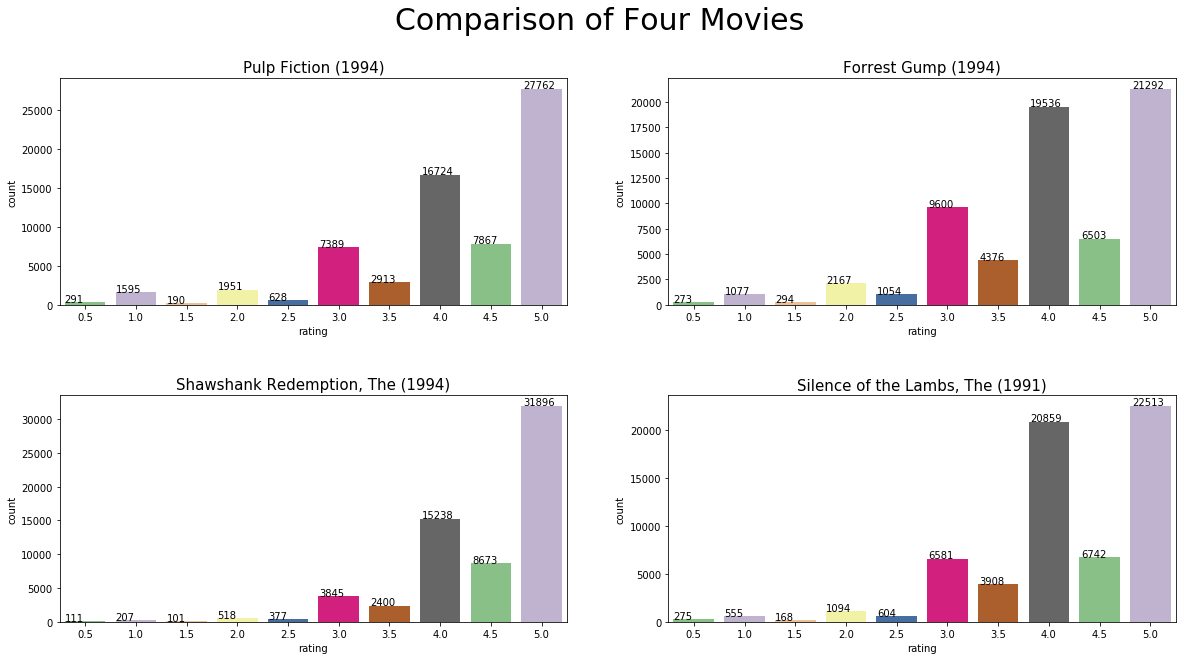

In [11]:
rating_movieId=pd.read_csv(r'C:\Users\mahre\Desktop\ml-20m\ratings.csv',usecols=['rating','movieId'])
movies_title=pd.read_csv(r'C:\Users\mahre\Desktop\ml-20m\movies.csv',usecols=['movieId','title'])
chk=Counter(rating_movieId.movieId).most_common(4)
d = {}
i=0;j=1
plt.suptitle('Comparison of Four Movies', fontsize=30)
for name in chk:
    movie_number=chk[i][0]
    i+=1
    d[name]=pd.DataFrame()
    d[name] = rating_movieId[rating_movieId['movieId'] == movie_number]
    plot(j)
    j+=1
    ax = sns.countplot(x='rating',data=d[name], palette='Accent')  
    a=movies_title.movieId[movies_title.movieId==movie_number].index.tolist()
    b=movies_title.title[a[0]]
    ax.set_title(b,size=15)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), size=10)


##### DataFrame 'rating_movieId' is being created using 'ratings.csv' and column 'rating' 'movieId'
##### DataFrame 'movies_title' is being created using 'movies.csv' and column 'title' 'movieId'
##### sorting and selecting top 4 movies using 'Counter' and saving it in 'chk'
##### Getting movie title from movies.csv using movieId of chk
##### Creating DataFrames with movie title by filtering from 'rating_movieId' 
##### Using newly created DataFrame ploting subplot 
